In [8]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.core import Spin

In [9]:
with MPRester("n58KMF7umZMAJXouXDJc0vORWlcEfEsD") as m :
    struc = m.get_structure_by_material_id("mp-23209")
    bs = m.get_bandstructure_by_material_id("mp-23209")
    dos = m.get_dos_by_material_id("mp-23209") 

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Bande interdite
Information : 
  {'direct': False, 'energy': 5.2286, 'transition': 'X-\\Gamma'} 

Energie de la bande interdite : 
 5.2286 [eV]


Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

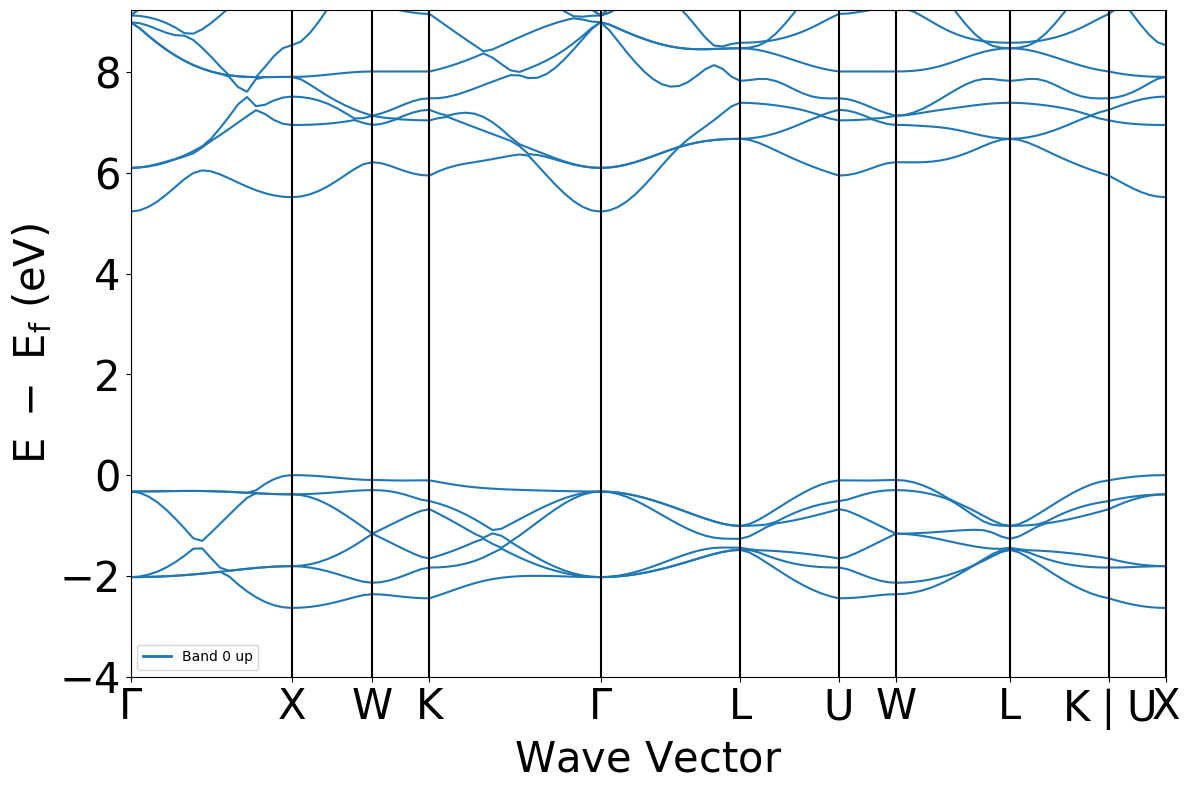

In [10]:
# Informations et valeurs 
print("Bande interdite")
print("Information : \n " , bs.get_band_gap(), "\n")
energy = bs.get_band_gap()['energy']
print("Energie de la bande interdite : \n", energy , "[eV]")


band = m.get_bandstructure_by_material_id("mp-23209")
bsplotter = BSPlotter(band)
bsplotter.show()


In [11]:
#première bande de conduction 

Energy_Condu = bs.get_cbm()["energy"]
numero_Condu = bs.get_cbm()['band_index'][Spin.up][0]
print("Numéro de la première bande de conduction : \n ", numero_Condu,"\n")
print("Energie de la bande de conduction: \n", Energy_Condu, "\n")

Numéro de la première bande de conduction : 
  12 

Energie de la bande de conduction: 
 5.1886 



In [12]:
#dernière bande de valence 

Energy_Valence = bs.get_vbm()["energy"]
numero_Valence = bs.get_vbm()['band_index'][Spin.up][0]
print("Numéro de la dernière bande de valence : \n ", numero_Valence,"\n")
print("Energie de la bande de valence: \n",Energy_Valence, "\n")

Numéro de la dernière bande de valence : 
  11 

Energie de la bande de valence: 
 -0.04 



La pente max correspondant à la première bande de conduction est 1.8702728404025486
Sa direction est (Γ)  4 vers (L) 5 flèche rouge 

La pente min correspondant à la première bande de conduction est 0.3203292036127227
Sa direction est (Γ)  0 vers (X) 1 flèche bleu

La pente max correspondant à la dernière bande de valence est 1.6557361370242538
Sa direction est (L)  5 vers (U) 6 flèche verte

La pente min correspondant à la dernière bande de valence est 0.023158273812779965
Sa direction est (U)  6 vers (W) 7 flèche jaune 



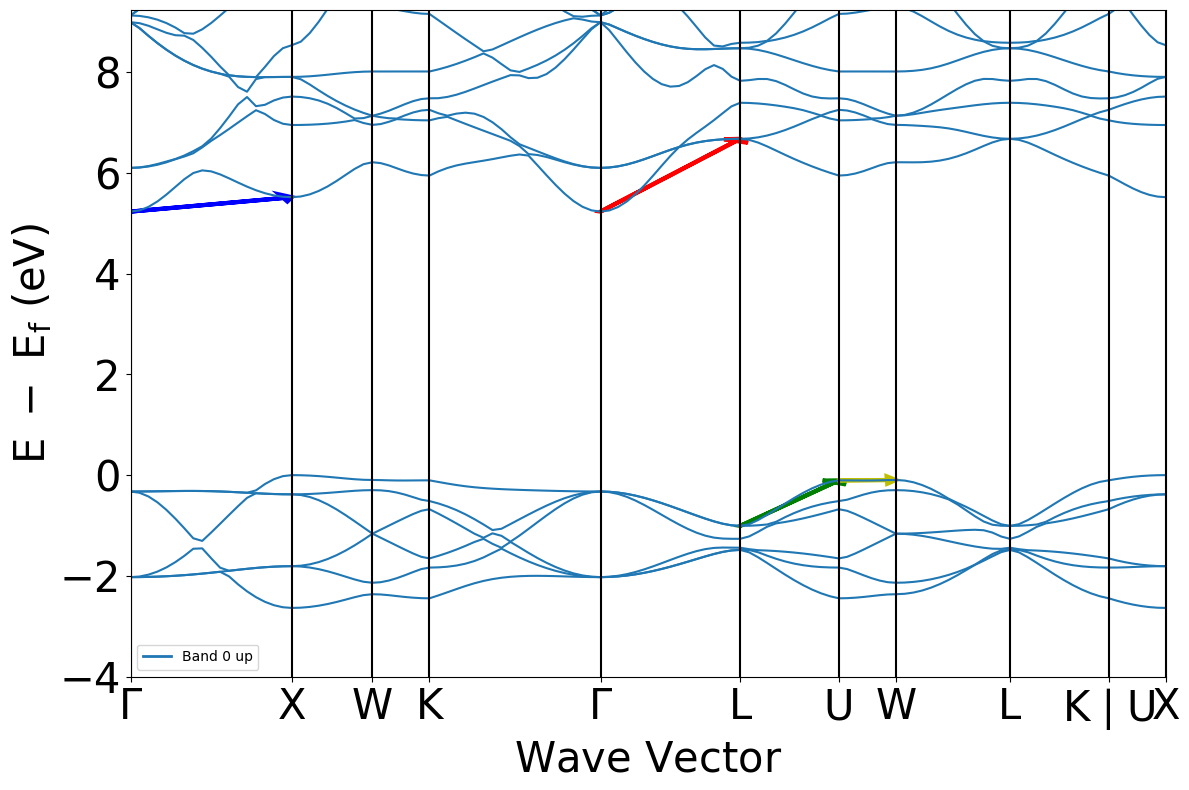

In [13]:
#directions de dispersion 
data = bsplotter.bs_plot_data()
pl = bsplotter.get_plot()
Ene = data.get('energy').get('1')
D = data.get('ticks').get('distance')

Valance_dispo = np.zeros(10)
Conduction_dispo = np.zeros(10)
redon = np.unique(D)   
for i in range(10):
    Delta = redon[i+1]-redon[i]
    Valance_dispo[i] = abs(((Ene[i][numero_Valence])[-1] - (Ene[i][numero_Valence])[0])/(Delta) )
    Conduction_dispo[i] = abs(((Ene[i][numero_Condu])[-1] - (Ene[i][numero_Condu])[0])/(Delta) )

print("La pente max correspondant à la première bande de conduction est", np.max(Conduction_dispo))
print("Sa direction est (Γ) " ,np.argmax(Conduction_dispo), "vers (L)"  ,np.argmax(Conduction_dispo)+1,"flèche rouge \n" )
print("La pente min correspondant à la première bande de conduction est", np.min(Conduction_dispo))
print("Sa direction est (Γ) " ,np.argmin(Conduction_dispo), "vers (X)"  ,np.argmin(Conduction_dispo)+1, "flèche bleu\n" )
print("La pente max correspondant à la dernière bande de valence est", np.max(Valance_dispo))
print("Sa direction est (L) " ,np.argmax(Valance_dispo), "vers (U)"  ,np.argmax(Valance_dispo)+1, "flèche verte\n" )
print("La pente min correspondant à la dernière bande de valence est", np.min(Valance_dispo))
print("Sa direction est (U) " ,np.argmin(Valance_dispo), "vers (W)"  ,np.argmin(Valance_dispo)+1, "flèche jaune \n" )


plt.arrow(redon[4], (Ene[4][numero_Condu])[0],redon[5] - redon[4], (Ene[4][numero_Condu])[-1] - (Ene[4][numero_Condu])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(redon[0], (Ene[0][numero_Condu])[0], redon[1] -redon[0], (Ene[0][numero_Condu])[-1] - (Ene[0][numero_Condu])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(redon[5], (Ene[5][numero_Valence])[0], redon[6] - redon[5], (Ene[5][numero_Valence])[-1] - (Ene[5][numero_Valence])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(redon[6], (Ene[6][numero_Valence])[0], redon[7] - redon[6], (Ene[6][numero_Valence])[-1] - (Ene[6][numero_Valence])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)
plt.show()



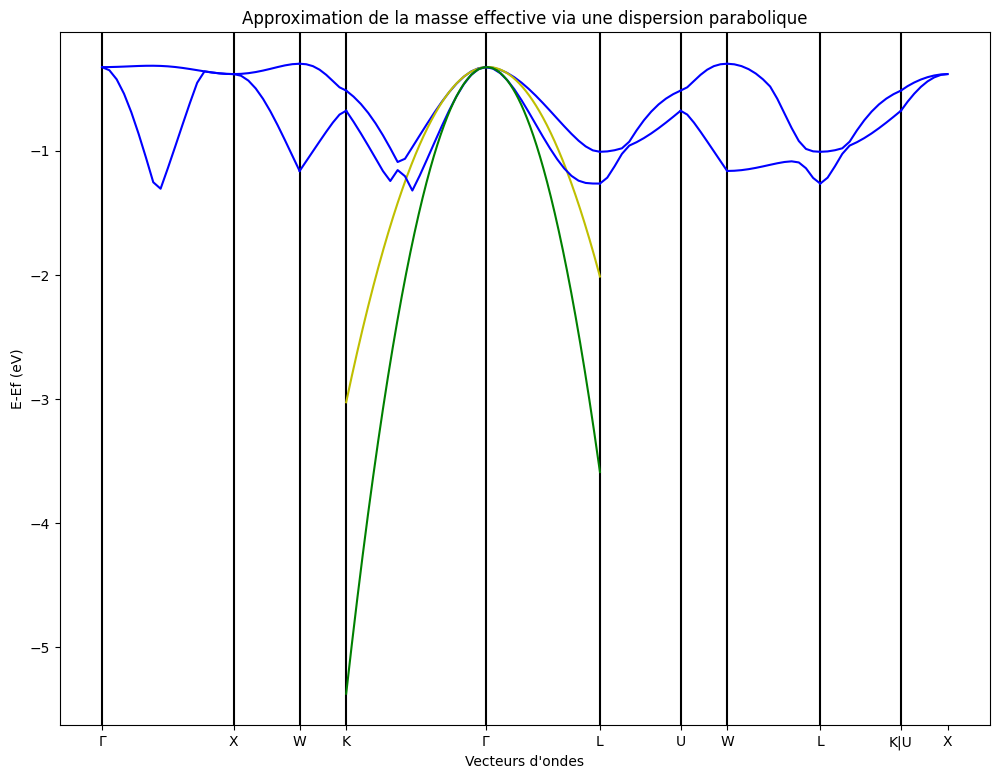

Bande de valence : 
Parabole approximant la dernière bande de valence à son sommet : 
       y(k) = -5.568921787448224k² + 29.012855495816524k -38.113323499100865
Dérivée seconde de la courbe = -11.137843574896449 eVÅ²
Masse effective au sommet de la dernière bande de valence = -1.1667747067025193e-35 kg



Bande de conduction : 
Parabole approximant la première bande de conduction à sa base : 
       y(k) = -2.9360063618875114k² 15.337332712554003k + -20.35429380259431
Dérivée seconde de la courbe = -5.872012723775023 eVÅ²
Masse effective au sommet de la dernière bande de valence = -6.151384581283062e-36 kg


In [15]:
fig,ax = plt.subplots(1,1,figsize=(12,9))

# Placement axes verticaux.
location = []
distance = data.get('distances') # Tableau d'arrays contenant les différents segments. 
energie = data.get('energy')
for i in range(len(distance)):
    plt.axvline(distance[i][0],color="black")
    location.append(distance[i][0])
location.append(distance[i][len(distance[i]) - 1])
ax.set_xticks(location)
ax.set_xticklabels(['\u0393','X','W','K','\u0393','L','U','W','L','K|U','X'])
ax.set_xlabel("Vecteurs d'ondes")
ax.set_ylabel("E-Ef (eV)")


# Bande conduction : 
for i in range(len(distance)) : 
    energie_cond = energie.get('1')[i][10]
    dist = distance[i]
    plt.plot(dist, energie_cond, color = 'blue')
    
x_cond = []
for i in range(int(len(distance[3])*3/4), len(distance[3])) : 
    x_cond.append(distance[3][i])
for i in range(int(len(distance[4])/4)) : 
    x_cond.append(distance[4][i])

y_cond = []
for i in range(int(len(energie.get('1')[3][10])*3/4), len(energie.get('1')[3][10])) : 
    y_cond.append(energie.get('1')[3][10][i])
for i in range(int(len(energie.get('1')[4][10])/4)) : 
    y_cond.append(energie.get('1')[4][10][i])

a_cond = np.polyfit(x_cond,y_cond,2)
x_cond = np.linspace(distance[3][0],distance[4][-1],1000)

plt.plot(x_cond,np.polyval(a_cond,x_cond),'y') 


# Bande de valence.
for i in range(len(distance)) : 
    energie_cond = energie.get('1')[i][9]
    dist = distance[i]
    plt.plot(dist, energie_cond, color = 'blue')

x_val = []
for i in range(int(len(distance[3])*3/4), len(distance[3])) : 
    x_val.append(distance[3][i])
for i in range(int(len(distance[4])/4)) : 
    x_val.append(distance[4][i])

y_val = []
for i in range(int(len(energie.get('1')[3][9])*3/4), len(energie.get('1')[3][9])) : 
    y_val.append(energie.get('1')[3][9][i])
for i in range(int(len(energie.get('1')[4][9])/4)) : 
    y_val.append(energie.get('1')[4][9][i])

a = np.polyfit(x_val,y_val,2)

x_val = np.linspace(distance[3][0],distance[4][-1],1000)
plt.plot(x_val,np.polyval(a,x_val),'g')
plt.title("Approximation de la masse effective via une dispersion parabolique")

plt.show()


print("Bande de valence : ")
print("Parabole approximant la dernière bande de valence à son sommet : \n       y(k) = "+str(a[0])+"k\u00b2 + "+str(a[1])+"k "+str(a[2]))
derivee2 = a[0]*2
print("Dérivée seconde de la courbe = " + str(derivee2) + " eV\u212b\u00b2")
print("Masse effective au sommet de la dernière bande de valence = " + str((6.62607004*10**(-34))/((2*np.pi)**2*pow(derivee2, -1)*1.602176634*10)) + " kg")

print("\n\n")
print("Bande de conduction : ")
print("Parabole approximant la première bande de conduction à sa base : \n       y(k) = "+str(a_cond[0])+"k\u00b2 "+str(a_cond[1])+"k + "+str(a_cond[2]))
derivee2_cond = a_cond[0]*2
print("Dérivée seconde de la courbe = " + str(derivee2_cond) + " eV\u212b\u00b2")
print("Masse effective au sommet de la dernière bande de valence = " + str((6.62607004*10**(-34))/((2*np.pi)**2*pow(derivee2_cond, -1)*1.602176634*10)) + " kg")